## FacDB QAQC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
facdb_old = pd.read_csv('https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/facilities_csv_201901.zip')
facdb_new = pd.read_csv('https://raw.githubusercontent.com/NYCPlanning/db-facilities-tmp/dev/output/facilities.csv')

## First 2 reports
1. Summary stats by data source - data source, count in new DB, count or percent in new DB with geometry, count in old DB, count or percent in old DB with geometry
2. Summary stats by facility subgroup - count in new DB, count or percent in new DB with geometry, count in old DB, count or percent in old DB with geometry, subgroup, group, domain
3. Summary stats by column - number of missing values for each column in new DB and old DB

In [3]:
facdb_new.columns

Index(['facname', 'addressnum', 'streetname', 'address', 'city', 'zipcode',
       'boro', 'borocode', 'bin', 'bbl', 'commboard', 'nta', 'council',
       'schooldist', 'policeprct', 'censtract', 'factype', 'facsubgrp',
       'facgroup', 'facdomain', 'servarea', 'opname', 'opabbrev', 'optype',
       'overagency', 'overabbrev', 'overlevel', 'capacity', 'captype',
       'proptype', 'latitude', 'longitude', 'xcoord', 'ycoord', 'datasource',
       'uid', 'geom'],
      dtype='object')

### 1.Summary stats by data source
#### 1.1 number of facilities by datasouce in the new DB and the old DB

In [4]:
datasource_old = sum(facdb_old.pgtable.apply(lambda x: x.replace('facilities_', '').split(';')).values.tolist(),[])
datasource_old = pd.DataFrame(datasource_old,columns =['datasource']) 

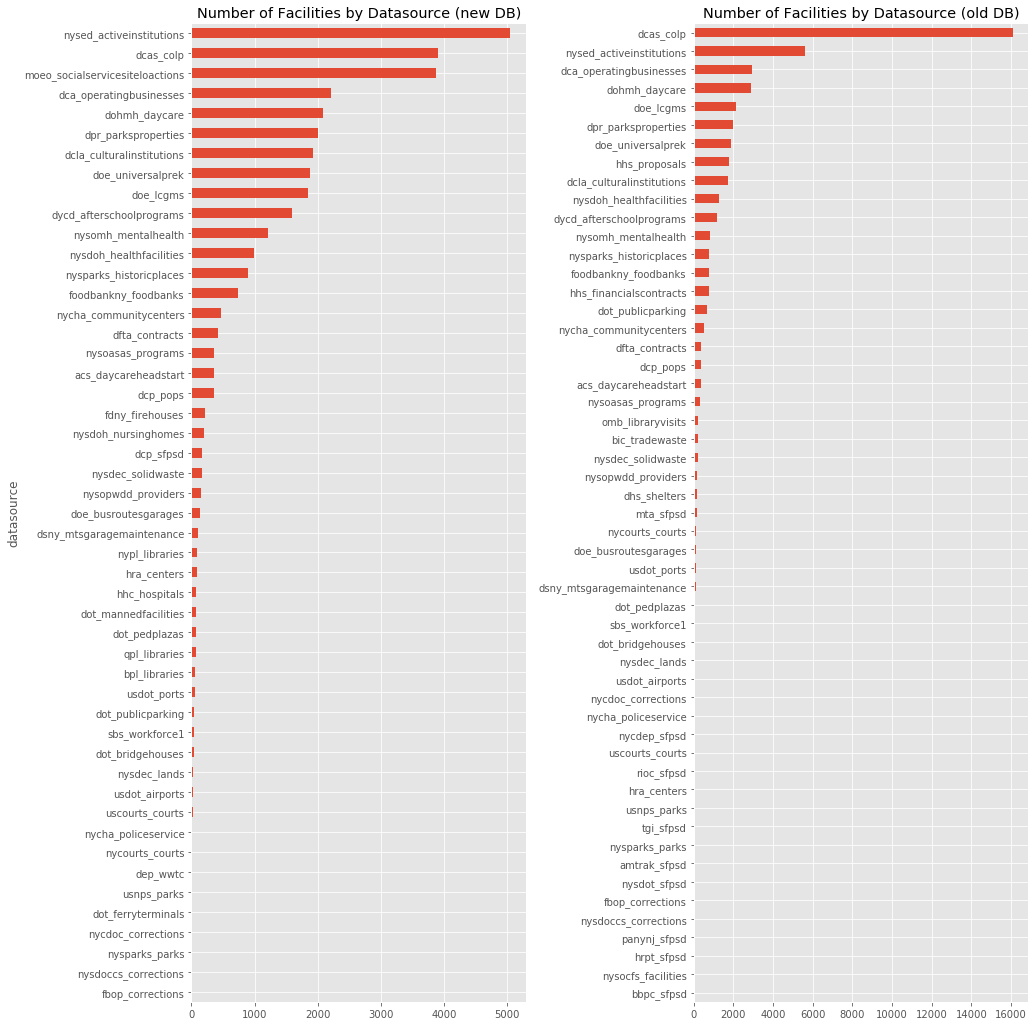

In [5]:
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
facdb_new.groupby('datasource').count()['uid'].sort_values(ascending=False)[::-1].plot(kind='barh', figsize=(15,18),title='Number of Facilities by Datasource (new DB)')
plt.subplot(1, 2, 2)
datasource_old.datasource.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(15,18) ,title='Number of Facilities by Datasource (old DB)')

#### 1.2 number of facilities without geoms and percentage with geoms by datasouce in the new DB

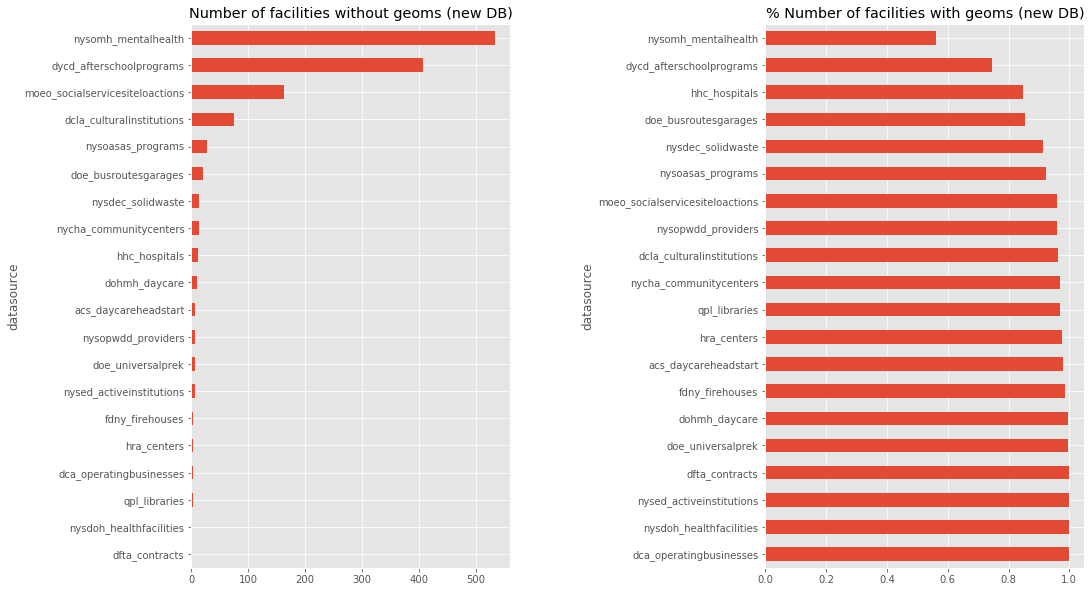

In [6]:
plt.subplots_adjust(wspace=0.8)
plt.subplot(1, 2, 1)
facdb_new[facdb_new.geom.isna()].groupby('datasource').count()['uid']\
                                .sort_values(ascending=False)\
                                .head(20)[::-1]\
                                .plot(kind='barh', figsize=(16,10), title = 'Number of facilities without geoms (new DB)')
plt.subplot(1, 2, 2)
(facdb_new[~facdb_new.geom.isna()].groupby('datasource').count()['uid']/facdb_new.groupby('datasource').count()['uid'])\
                                                                                .sort_values(ascending=True)\
                                                                                .head(20)[::-1]\
                                                                                .plot(kind='barh', figsize=(16,10), title = '% Number of facilities with geoms (new DB)')

#### 1.3 number of facilities without geoms and percentage with geoms by datasouce in the old DB

In [7]:
len(facdb_old[facdb_old.the_geom.isna()])

0

#### All records in Old DB have geoms.

### 2.Summary stats by facility subgroup
#### 2.1 number of facilities by facility subgroup in the new DB and the old DB

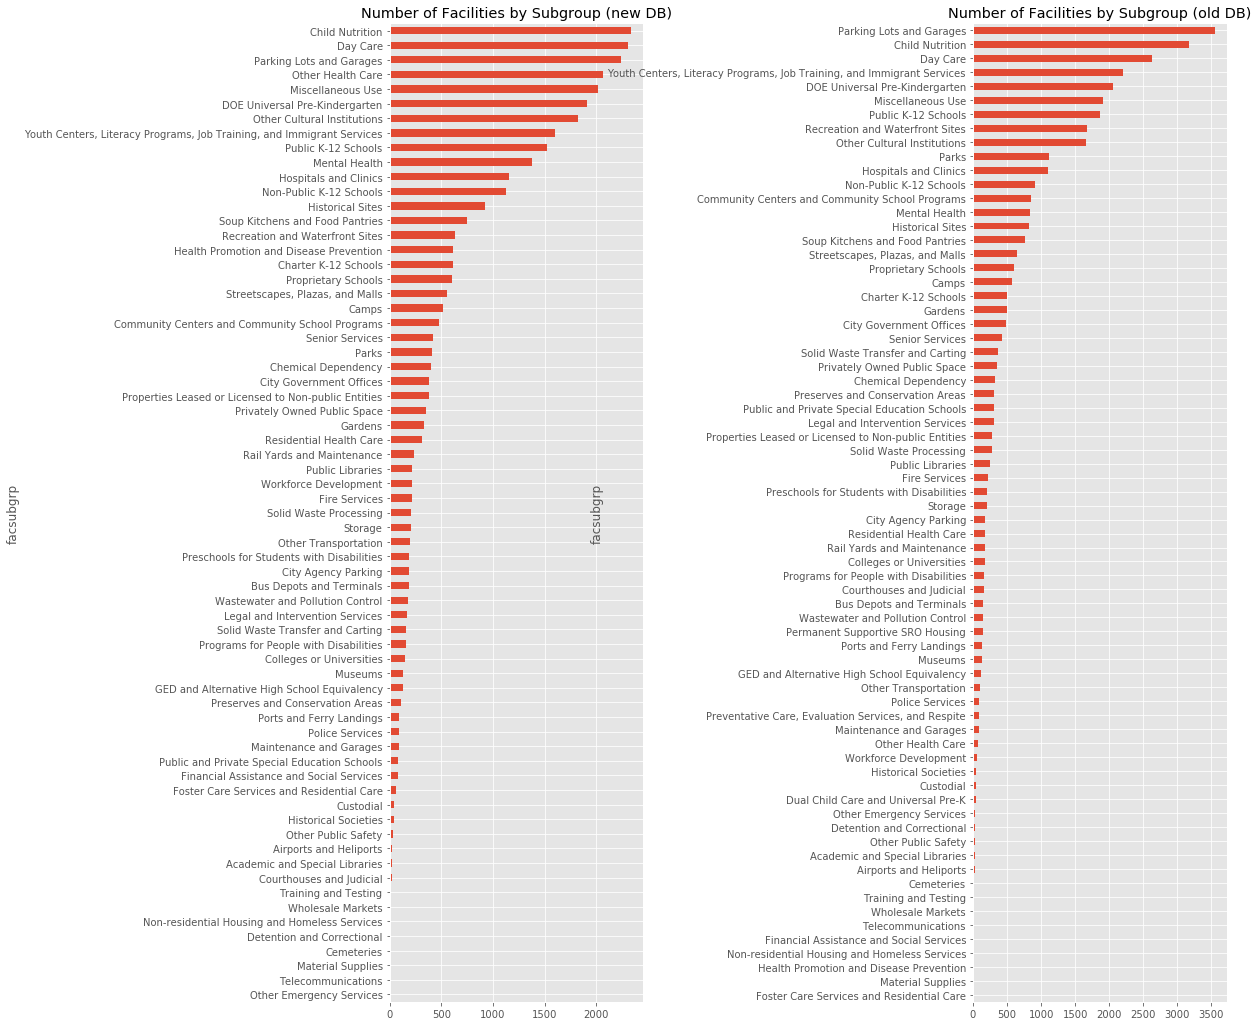

In [8]:
plt.subplots_adjust(wspace=1.3)
plt.subplot(1, 2, 1)
facdb_new.groupby('facsubgrp').count()['uid'].sort_values(ascending=False)[::-1].plot(kind='barh', figsize=(15,18),title='Number of Facilities by Subgroup (new DB)')
plt.subplot(1, 2, 2)
facdb_old.groupby('facsubgrp').count()['uid'].sort_values(ascending=False)[::-1].plot(kind='barh', figsize=(15,18),title='Number of Facilities by Subgroup (old DB)')

#### 2.2 number of facilities without geoms and percentage with geoms by facility subgroup in the new DB

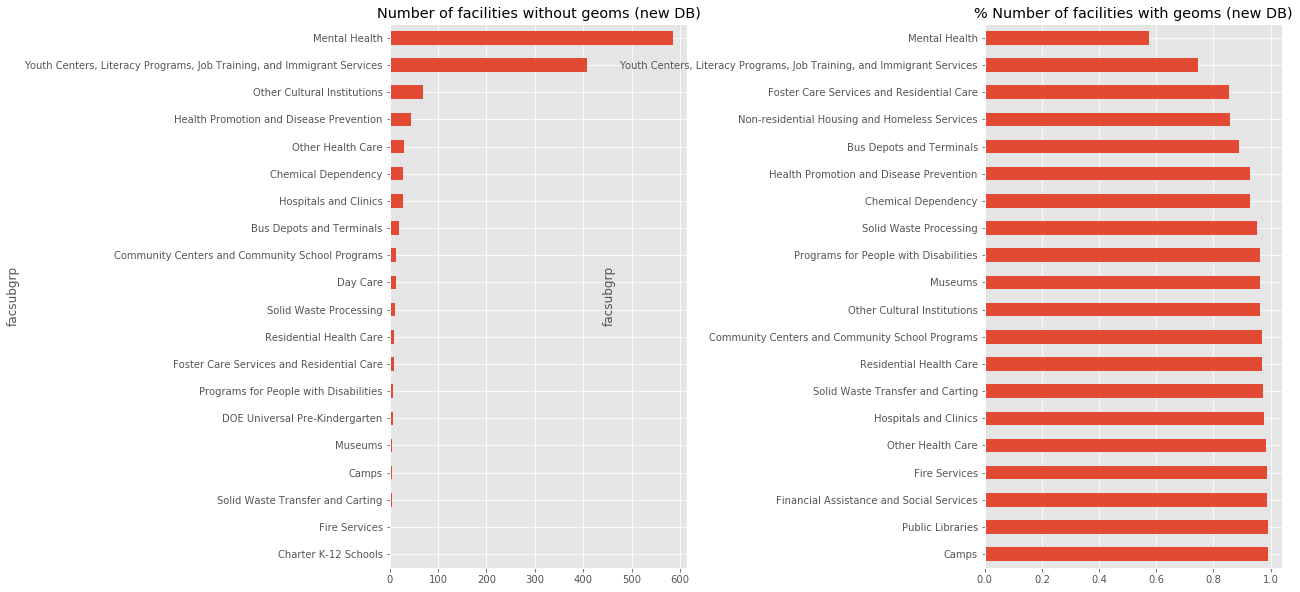

In [9]:
plt.subplots_adjust(wspace=1)
plt.subplot(1, 2, 1)
facdb_new[facdb_new.geom.isna()].groupby('facsubgrp').count()['uid']\
                                .sort_values(ascending=False)\
                                .head(20)[::-1]\
                                .plot(kind='barh', figsize=(16,10), title = 'Number of facilities without geoms (new DB)')
plt.subplot(1, 2, 2)
(facdb_new[~facdb_new.geom.isna()].groupby('facsubgrp').count()['uid']/facdb_new.groupby('facsubgrp').count()['uid'])\
                                                                                .sort_values(ascending=True)\
                                                                                .head(20)[::-1]\
                                                                                .plot(kind='barh', figsize=(16,10), title = '% Number of facilities with geoms (new DB)')

### 3. Summary stats by column 

#### 3.1 Find number of NaN values for each column in the new DB and the old DB

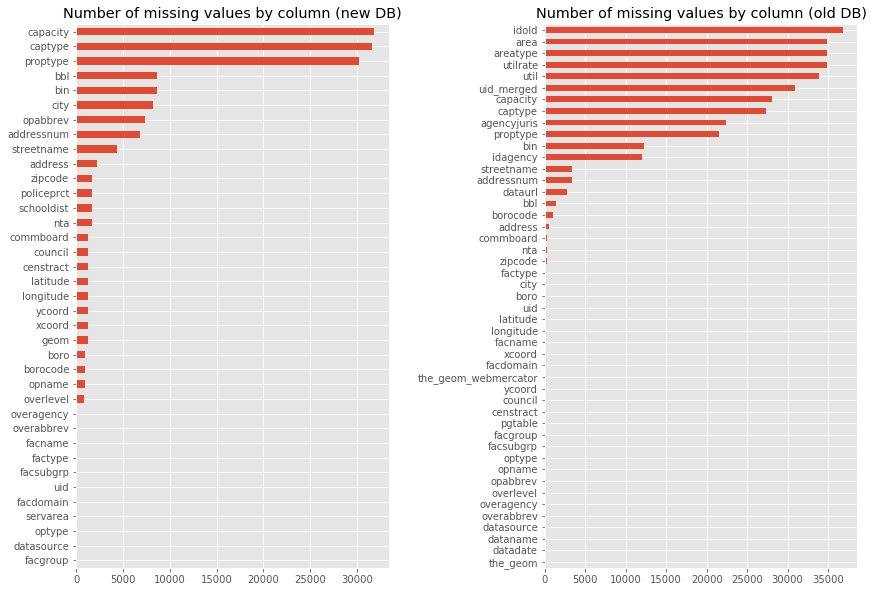

In [10]:
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
facdb_new.isna().sum().sort_values(ascending=False)[::-1].plot(kind='barh', figsize=(14,10), title = 'Number of missing values by column (new DB)')
plt.subplot(1, 2, 2)
facdb_old.isna().sum().sort_values(ascending=False)[::-1].plot(kind='barh', figsize=(14,10), title = 'Number of missing values by column (old DB)')

#### There are 3 facilities in New DB don't have facnames

In [11]:
facdb_new[facdb_new.facname.isna()]

,facname,addressnum,streetname,address,city,zipcode,boro,borocode,bin,bbl,...,capacity,captype,proptype,latitude,longitude,xcoord,ycoord,datasource,uid,geom
1619,NaN,52,DUANE STREET,52 DUANE STREET,NEW YORK,10007.0,Manhattan,1.0,1001673.0,1.001550e+09,...,NaN,NaN,NaN,40.714242,-74.004000,9.831403e+05,199497.139593,uscourts_courts,4c799254f83d53ceebb20eb6f03a3dd5,0101000020E61000002ABD0E96418052C09347EA8C6C5B...
18648,NaN,90-02,161 STREET,90-02 161 STREET,JAMAICA,11432.0,Queens,4.0,4208850.0,4.097570e+09,...,NaN,NaN,NaN,40.705175,-73.799657,1.039799e+06,196254.353604,uscourts_courts,e0d6123123ddd0827a5df97fa7bc5f50,0101000020E61000005CD57B752D7352C0F7618B2E435A...
25560,NaN,147,PIERREPONT STREET,147 PIERREPONT STREET,BROOKLYN,11201.0,Brooklyn,3.0,3001937.0,3.002390e+09,...,NaN,NaN,NaN,40.695127,-73.991439,9.866128e+05,192537.999652,uscourts_courts,f071b135652218e19802ea32b45ee196,0101000020E6100000DBAA7665747F52C0A7EC5CA2FA58...
